In [33]:
import pandas as pd
import numpy as np

In [34]:
df= pd.read_csv("Groceries_dataset.csv")

In [35]:
d=df.set_index(['Date'])
d

,Member_number,itemDescription
Date,,
21-07-2015,1808,tropical fruit
05-01-2015,2552,whole milk
19-09-2015,2300,pip fruit
12-12-2015,1187,other vegetables
01-02-2015,3037,whole milk
...,...,...
08-10-2014,4471,sliced cheese
23-02-2014,2022,candy
16-04-2014,1097,cake bar


In [36]:
d.index=pd.to_datetime(d.index)

In [37]:
total_items = len(d)
total_days = len(np.unique(d.index.date))
total_months = len(np.unique(d.index.month))
total_years = len(np.unique(d.index.year))
average_items = total_items / total_days
unique_items = d.itemDescription.unique().size
average_items_customer= average_items/d.Member_number.unique().size*total_days

print(f"There are {unique_items} unique items sold ")
print("Total {} items sold in {} days throughout {} years".format(total_items, total_days, total_years))
print("With an average of {} items sold daily".format(average_items))
print(f"Avarega items per customer per day {average_items_customer}")

There are 167 unique items sold 
Total 38765 items sold in 728 days throughout 2 years
With an average of 53.24862637362637 items sold daily
Avarega items per customer per day 9.944843509492047


In [38]:
members_day=df.groupby(['Date'])['Member_number'].nunique()

In [39]:
members_day.mean()

20.553571428571427

In [40]:
df['itemDescription'].value_counts()

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64

In [41]:
df['itemDescription'].unique()

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

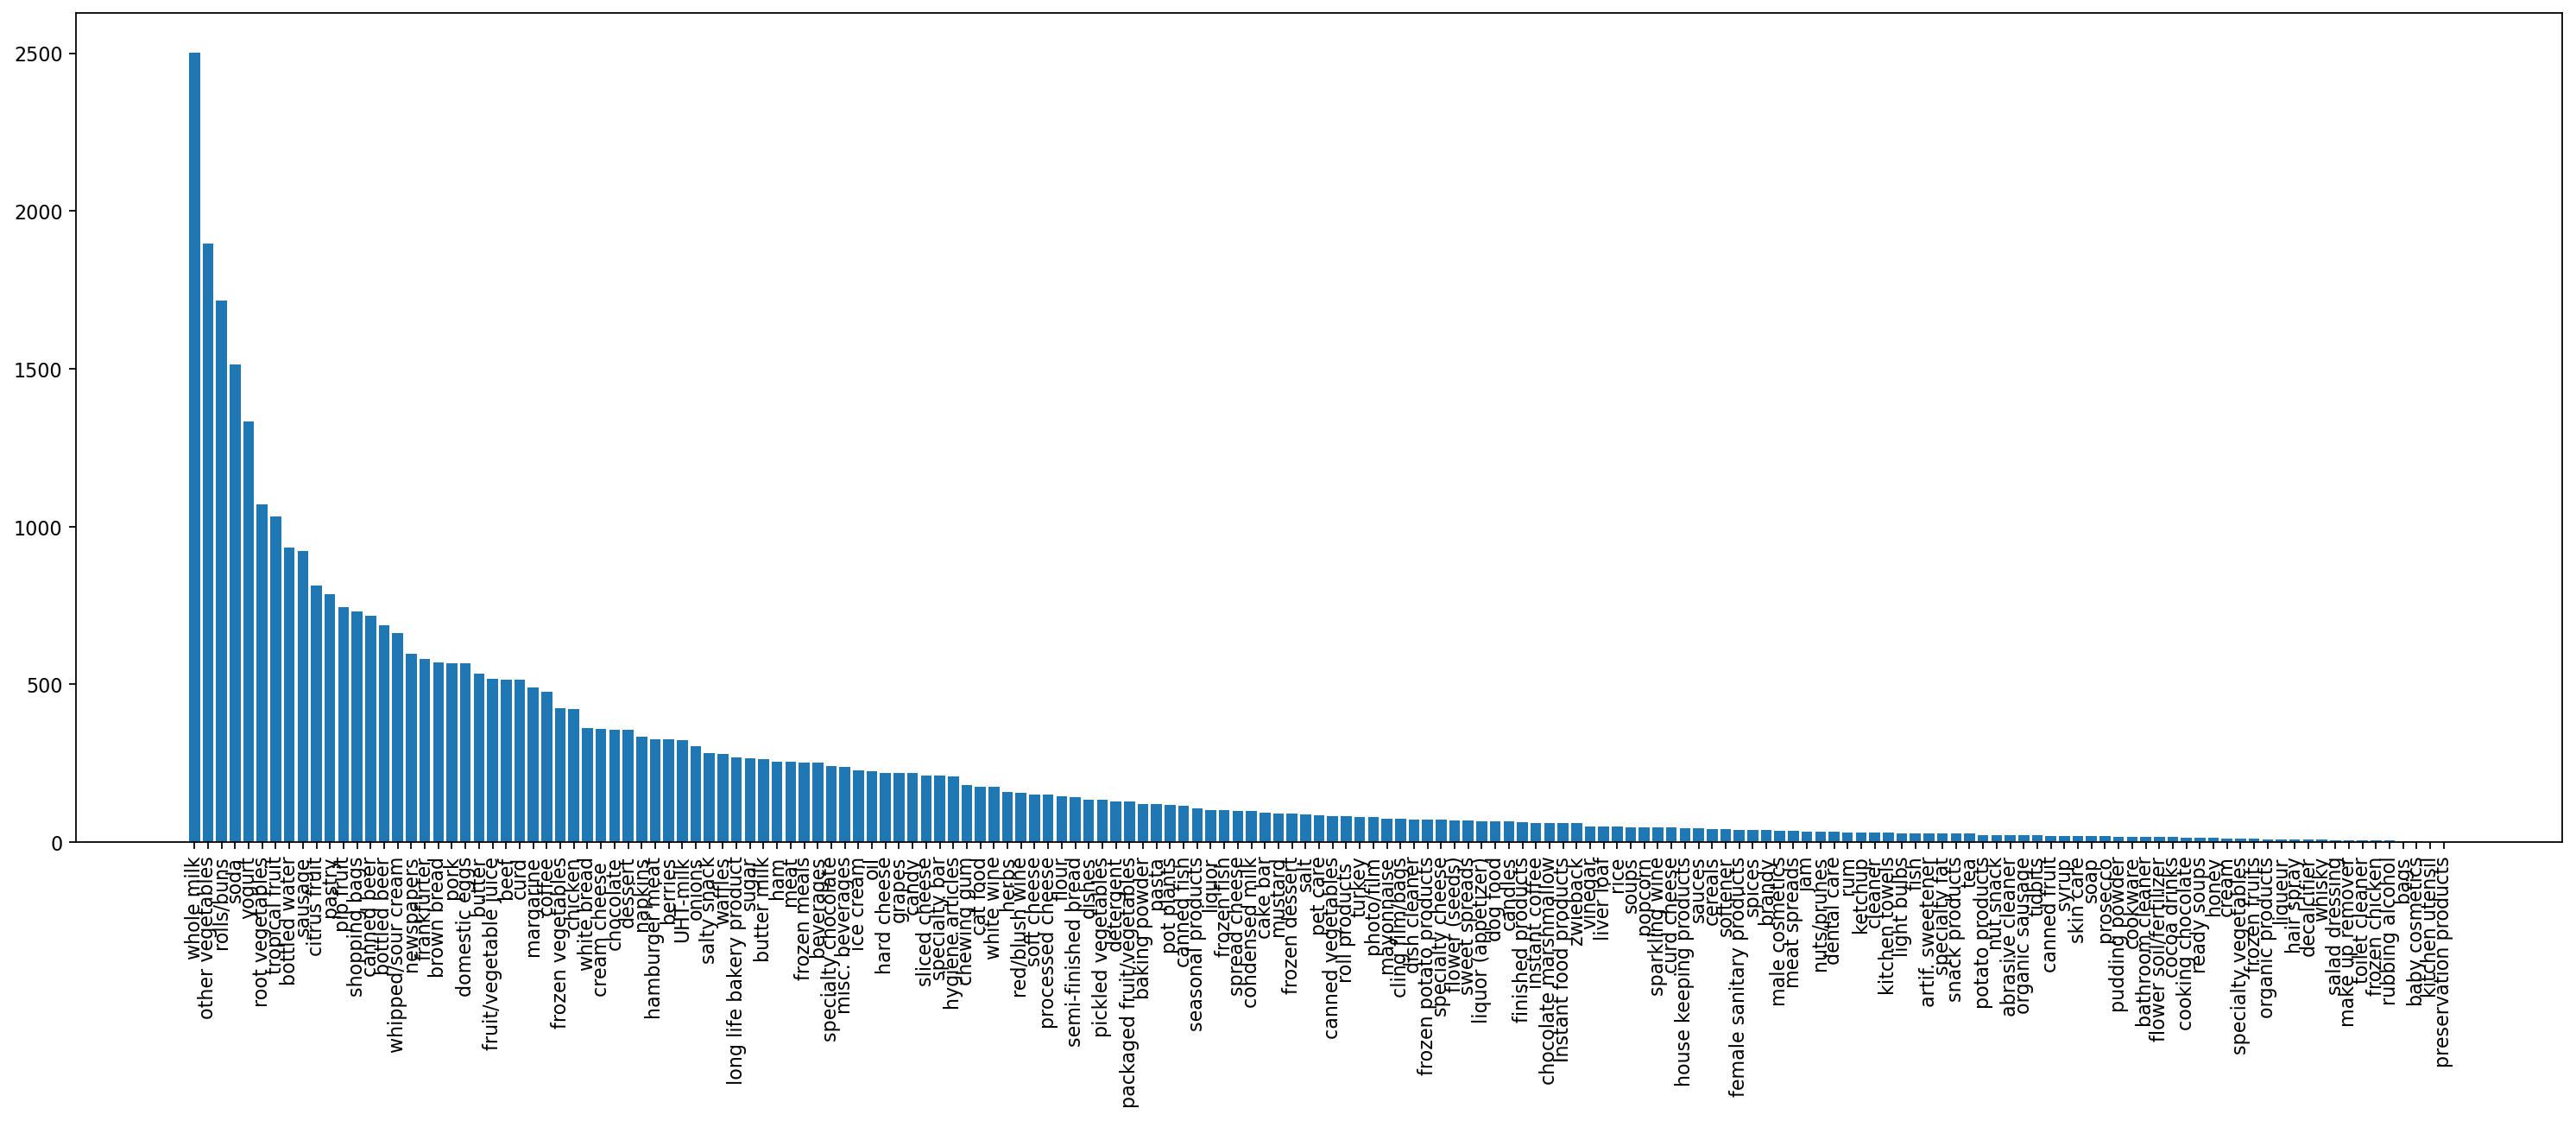

In [42]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18, 6),dpi=160)
ax = fig.add_axes([0,0,1,1])
items = df['itemDescription'].value_counts().keys()
count = df['itemDescription'].value_counts()
ax.bar(items,count)
plt.xticks(rotation='vertical')
plt.show()

In [73]:
transactions = [list( dict.fromkeys(a[1]['itemDescription'].tolist()) ) for a in list(df.groupby(['Member_number','Date']))]
transactions

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['sausage', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'hygiene articles'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['root vegetables', 'whole milk', 'pastry'],
 

In [74]:
fp= open(r'test.basket', 'w')
for transaction in transactions:
    fp.write(', '.join(transaction)+'\n')
fp.close()

In [14]:
transactions = df.join(pd.get_dummies(df.pop('itemDescription')))
transactions = transactions.groupby(['Member_number','Date'], as_index=False).sum()
transactions.pop("Member_number")
transactions.pop("Date")
transactions=transactions.apply(lambda x: x>0)
transactions

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
pf = transactions.describe()
pf

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
count,14963,14963,14963,14963,14963,14963,14963,14963,14963,14963,...,14963,14963,14963,14963,14963,14963,14963,14963,14963,14963
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,14903,14643,14941,14934,14960,14959,14842,14946,14455,14637,...,14883,14912,14686,14309,14955,14604,14788,12600,13678,14903


In [16]:
transactions.to_csv("lr.csv", index=False)

In [17]:
from mlxtend.frequent_patterns import apriori, association_rules

In [25]:
freq_items = apriori(transactions, min_support=0.01, use_colnames=True)


,support,itemsets
49,0.060349,(sausage)
50,0.047584,(shopping bags)
51,0.014035,(sliced cheese)
52,0.097106,(soda)
53,0.010025,(soft cheese)
54,0.013968,(specialty bar)
55,0.015973,(specialty chocolate)
56,0.017710,(sugar)
57,0.067767,(tropical fruit)
58,0.018512,(waffles)


In [26]:
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))

In [27]:
freq_items.head(10)

,support,itemsets,length
0,0.021386,(UHT-milk),1
1,0.033950,(beef),1
2,0.021787,(berries),1
3,0.016574,(beverages),1
4,0.045312,(bottled beer),1
5,0.060683,(bottled water),1
6,0.037626,(brown bread),1
7,0.035220,(butter),1
8,0.017577,(butter milk),1
9,0.014369,(candy),1


In [28]:
freq_items.tail(10)

,support,itemsets,length
59,0.043708,(whipped/sour cream),1
60,0.023993,(white bread),1
61,0.011696,(white wine),1
62,0.157923,(whole milk),1
63,0.085879,(yogurt),1
64,0.010559,"(rolls/buns, other vegetables)",2
65,0.014837,"(whole milk, other vegetables)",2
66,0.013968,"(rolls/buns, whole milk)",2
67,0.011629,"(whole milk, soda)",2
68,0.011161,"(whole milk, yogurt)",2


In [31]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.01)
rules.info()
rules.sort_values(by=['confidence'],ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         10 non-null     object 
 1   consequents         10 non-null     object 
 2   antecedent support  10 non-null     float64
 3   consequent support  10 non-null     float64
 4   support             10 non-null     float64
 5   confidence          10 non-null     float64
 6   lift                10 non-null     float64
 7   leverage            10 non-null     float64
 8   conviction          10 non-null     float64
dtypes: float64(7), object(2)
memory usage: 848.0+ bytes


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861
4,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550
3,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551
7,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,-0.003707,0.956636
0,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,-0.002872,0.971117
2,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,-0.004446,0.968928
5,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350
1,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,-0.002872,0.974249
6,(whole milk),(soda),0.157923,0.097106,0.011629,0.073635,0.758296,-0.003707,0.974663
8,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638
